# Logistic Regression 

In [1]:
## Importing libraries

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [74]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
## Reading csv file

In [36]:
data=pd.read_csv(r"C:\Users\vigne\OneDrive\Desktop\sathish workbench\bi\New folder\Marketingcampaigns.csv")

In [57]:
data

,Customer id,Age,Gender,Location,Email Opened,Email Clicked,Product page visit,Discount offered,Purchased
0,1,22,0,Perth,1,1,3,1,1
1,2,55,0,Auckland,1,0,0,0,0
2,3,15,1,Sydney,0,1,2,1,1
3,4,25,0,Brisbane,1,1,5,1,0
4,5,36,1,Brisbane,0,1,1,1,0
5,6,30,0,Sydney,0,0,0,0,0
6,7,28,1,Sydney,0,0,3,1,1
7,8,19,1,Sydney,1,1,2,0,0
8,9,59,0,Perth,1,1,1,0,0
9,10,45,1,Auckland,0,0,0,0,0


In [37]:
data.head()

,Customer id,Age,Gender,Location,Email Opened,Email Clicked,Product page visit,Discount offered,Purchased
0,1,22,0,Perth,1,1,3,1,1
1,2,55,0,Auckland,1,0,0,0,0
2,3,15,1,Sydney,0,1,2,1,1
3,4,25,0,Brisbane,1,1,5,1,0
4,5,36,1,Brisbane,0,1,1,1,0


In [38]:
data.tail()

,Customer id,Age,Gender,Location,Email Opened,Email Clicked,Product page visit,Discount offered,Purchased
15,16,60,1,Sydney,1,0,0,0,0
16,17,53,1,Sydney,1,1,1,0,1
17,18,23,0,Perth,1,0,1,0,1
18,19,62,1,Perth,0,1,2,1,1
19,20,41,0,Brisbane,0,1,5,1,0


In [39]:
#EDA

In [40]:
data.shape


(20, 9)

In [41]:
data.columns

Index(['Customer id', 'Age', 'Gender', 'Location', 'Email Opened',
       'Email Clicked', 'Product page visit', 'Discount offered', 'Purchased'],
      dtype='object')

In [42]:
data.isna().sum()

Customer id           0
Age                   0
Gender                0
Location              0
Email Opened          0
Email Clicked         0
Product page visit    0
Discount offered      0
Purchased             0
dtype: int64

In [13]:
data.duplicated().sum()

0

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer id         20 non-null     int64 
 1   Age                 20 non-null     int64 
 2   Gender              20 non-null     int64 
 3   Location            20 non-null     object
 4   Email Opened        20 non-null     int64 
 5   Email Clicked       20 non-null     int64 
 6   Product page visit  20 non-null     int64 
 7   Discount offered    20 non-null     int64 
 8   Purchased           20 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 1.5+ KB


In [43]:
data['Gender'].value_counts()

1    11
0     9
Name: Gender, dtype: int64

In [18]:
data['Location'].value_counts()

Perth       8
Sydney      6
Auckland    3
Brisbane    3
Name: Location, dtype: int64

In [19]:
data['Email Opened'].value_counts()

1    10
0    10
Name: Email Opened, dtype: int64

In [20]:
data['Email Clicked'].value_counts()

1    12
0     8
Name: Email Clicked, dtype: int64

In [21]:
data['Product page visit'].value_counts()

2    5
0    4
1    4
3    3
5    3
4    1
Name: Product page visit, dtype: int64

In [22]:
data['Discount offered'].value_counts()

1    10
0    10
Name: Discount offered, dtype: int64

In [58]:
## using get dummies

In [59]:
data=pd.get_dummies(data, columns=['Location'], drop_first=True, dtype=int)

In [60]:
data.columns

Index(['Customer id', 'Age', 'Gender', 'Email Opened', 'Email Clicked',
       'Product page visit', 'Discount offered', 'Purchased',
       'Location_Brisbane', 'Location_Perth', 'Location_Sydney'],
      dtype='object')

In [23]:
## Train test split

In [61]:
X=data.drop(['Customer id','Purchased'], axis=1)

In [62]:
X.head()

,Age,Gender,Email Opened,Email Clicked,Product page visit,Discount offered,Location_Brisbane,Location_Perth,Location_Sydney
0,22,0,1,1,3,1,0,1,0
1,55,0,1,0,0,0,0,0,0
2,15,1,0,1,2,1,0,0,1
3,25,0,1,1,5,1,1,0,0
4,36,1,0,1,1,1,1,0,0


In [63]:
Y=data['Purchased']

In [64]:
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Purchased, dtype: int64

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train, x_test, y_train, y_test= train_test_split( X, Y, random_state=9, test_size=0.25)

In [67]:
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)

In [68]:
x_train.head()

,Age,Gender,Email Opened,Email Clicked,Product page visit,Discount offered,Location_Brisbane,Location_Perth,Location_Sydney
15,60,1,1,0,0,0,0,0,1
2,15,1,0,1,2,1,0,0,1
4,36,1,0,1,1,1,1,0,0
9,45,1,0,0,0,0,0,0,0
10,43,0,0,1,5,1,0,0,0


In [69]:
y_test.head()

,Purchased
3,0
6,1
7,0
5,0
16,1


In [54]:
## model building

In [70]:
from sklearn.linear_model import LogisticRegression

In [75]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [76]:
## prediction

In [78]:
y_pred=logreg.predict(x_test)

In [79]:
y_pred

array([1, 1, 1, 0, 0], dtype=int64)

In [80]:
## Model evalution for classification

In [82]:
from sklearn.metrics import accuracy_score, classification_report

In [85]:
acc=accuracy_score(y_pred,y_test)

In [86]:
acc

0.4

In [87]:
cls_rep=classification_report(y_test, y_pred)

In [88]:
cls_rep

'              precision    recall  f1-score   support\n\n           0       0.50      0.33      0.40         3\n           1       0.33      0.50      0.40         2\n\n    accuracy                           0.40         5\n   macro avg       0.42      0.42      0.40         5\nweighted avg       0.43      0.40      0.40         5\n'

In [89]:
print(cls_rep)

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.33      0.50      0.40         2

    accuracy                           0.40         5
   macro avg       0.42      0.42      0.40         5
weighted avg       0.43      0.40      0.40         5



In [91]:
# Plotting of AUC-ROC

from sklearn.metrics import roc_curve, auc
     

fpr, tpr, threshold = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])

In [92]:
fpr

array([0., 0., 1., 1.])

In [93]:
 tpr

array([0. , 0.5, 0.5, 1. ])

In [94]:
threshold 

array([1.82764355, 0.82764355, 0.33784481, 0.18162985])

In [96]:
area = auc(fpr, tpr)
     

print('AUC', area)

AUC 0.5


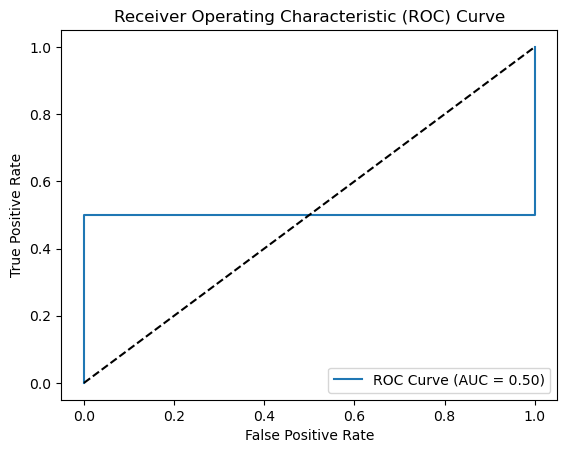

In [97]:

plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(area))
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()